# EDA on the Data

In [98]:
import os, glob

import pandas as pd 
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(font_scale=1.5)

## 1. Basic Data Summary

In [27]:
data_dir = '/home/redwan/PlantVillage-Dataset/raw/color'
class_names = sorted(os.listdir(data_dir))
filepaths = glob.glob(f'{data_dir}/*/*.JPG')
print(f'{len(filepaths)} images from {len(class_names)} classes found in the dataset')

fruit_species = set([cls_name.split('_')[0] for cls_name in class_names])
print(f'Total {len(class_names)} disease category found from {len(fruit_species)} fruit species')

52803 images from 38 classes found in the dataset
Total 38 disease category found from 14 fruit species 


In [44]:
class_name = []
fruit_name = []
filename = []
path = []

for filepath in filepaths:
    path.append(filepath)
    class_name.append(filepath.split('/')[6])
    filename.append(filepath.split('/')[-1])
    fruit_name.append(filepath.split('/')[6].split('_')[0])
    
df = pd.DataFrame({'filename': filename, 'class_name': class_name, 'fruit_name': fruit_name, 'path': path})

## 2. Class Frequency Distribution (All Classes)

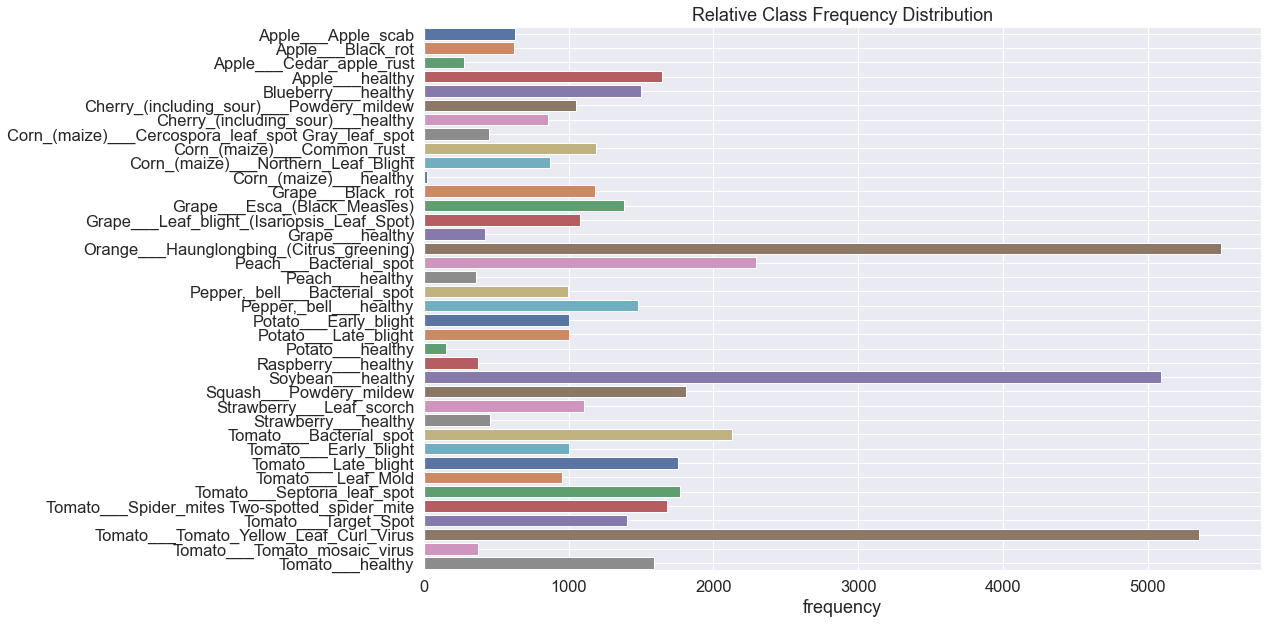

In [103]:
frqs = df['class_name'].value_counts().sort_index().to_frame('frequency')
f = plt.figure(figsize=(15, 10))
sns.barplot(y=frqs.index, x=frqs.frequency, palette='deep', orient='h')
plt.title('Relative Class Frequency Distribution')
plt.grid(True)
plt.show()

## 3. Class Frequency Distribution (Top 10 Frequent Classes)

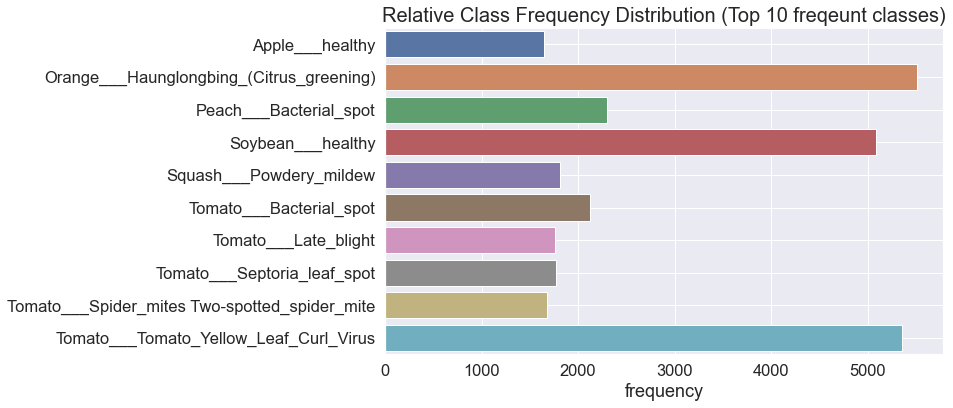

In [106]:
frqs = df['class_name'].value_counts().head(10).sort_index().to_frame('frequency')
f = plt.figure(figsize=(10, 6))
sns.barplot(y=frqs.index, x=frqs.frequency, palette='deep', orient='h')
plt.title('Relative Class Frequency Distribution (Top 10 freqeunt classes)', fontsize=20)
plt.grid(True)
plt.show()

## 3. Class Frequency Distribution (Top 10 Frequent Classes)

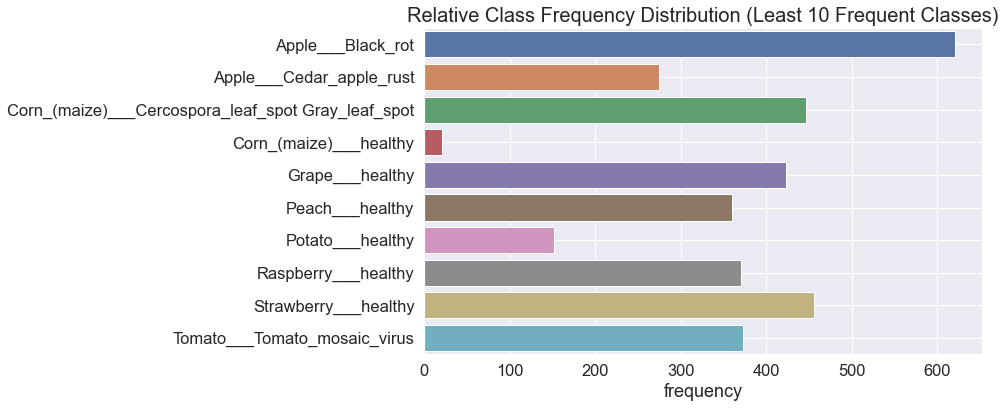

In [108]:
frqs = df['class_name'].value_counts().tail(10).sort_index().to_frame('frequency')
f = plt.figure(figsize=(10, 6))
sns.barplot(y=frqs.index, x=frqs.frequency, palette='deep', orient='h')
plt.title('Relative Class Frequency Distribution (Least 10 Frequent Classes)', fontsize=20)
plt.grid(True)
plt.show()

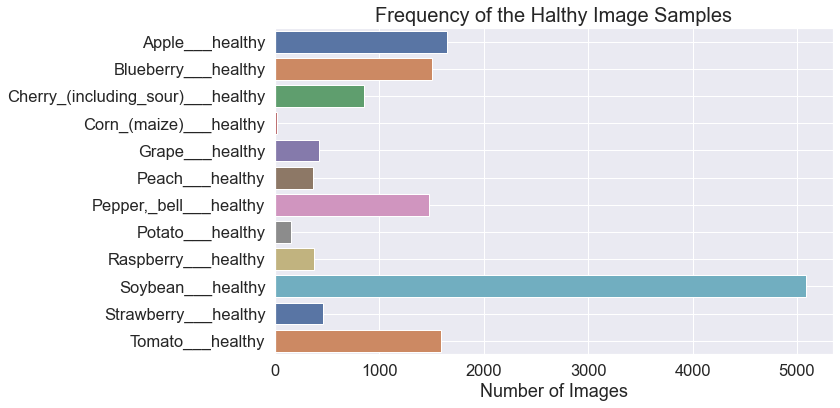

In [152]:
frqs = df['class_name'].value_counts().sort_index().to_frame('frequency').reset_index(level=0)

healthy_classes = []
healthy_frqs = []
for clss in class_names:
    if 'healthy' in clss:
        healthy_classes.append(clss)
        healthy_frqs.append(frqs[frqs['index'] == clss]['frequency'].values[0])

f = plt.figure(figsize=(10, 6))
sns.barplot(y=healthy_classes, x=healthy_frqs, palette='deep', orient='h')
plt.title('Frequency of the Halthy Image Samples', fontsize=20)
plt.xlabel('Number of Images')
plt.grid(True)
plt.show()

In [184]:
frqs_cls = df['fruit_name'].value_counts().sort_index().to_frame('total').reset_index(level=0)
healthy_df = pd.DataFrame({'index':[clss.split('_')[0] for clss in healthy_classes], 'healthy': healthy_frqs})
frqs_cls['healthy']=0

for plant_name in healthy_df['index']:
    idx = frqs_cls['index'].tolist().index(plant_name)
    frqs_cls.iloc[idx,2] = healthy_df.iloc[healthy_df['index'].tolist().index(plant_name),1]
    


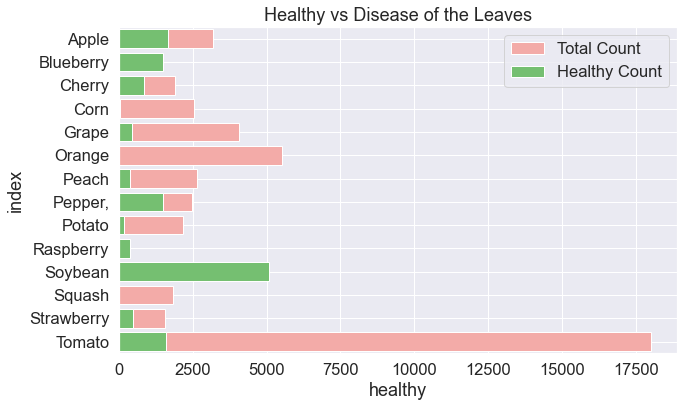

In [192]:
plt.figure(figsize=(10,6))
sns.set_color_codes('pastel')
sns.barplot(x='total', y = 'index', data = frqs_cls, label = 'Total Count', color='r')
sns.set_color_codes('muted')
sns.barplot(x='healthy', y='index', data=frqs_cls, label = 'Healthy Count', color='g')
plt.title('Healthy vs Disease of the Leaves')
plt.grid(True)
plt.legend()
plt.show()